In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

import random
from pprint import pprint

from decision_tree_functions import decision_tree_algorithm, decision_tree_predictions
from helper_functions import train_test_split, calculate_accuracy

# Load and Prepare Data

#### Format of the data
- the last column of the data frame must contain the label and it must also be called "label"
- there should be no missing values in the data frame

In [7]:
df = pd.read_csv(r"C:\Users\Himanshu\Desktop\My Things\Book3.csv")
df["label"] = df.classify
df = df.drop("classify", axis=1)

column_names = []
for column in df.columns:
    name = column.replace(" ", "_")
    column_names.append(name)
df.columns = column_names

df.head()

,response,reply,profile_useful,thickness,template,star_rating,verified,helpful_votes,label
0,Y,Y,>=20%,thick,N,>=2,False,>=50,nf
1,Y,Y,>=20%,thick,N,<2,True,>=50,nf
2,Y,Y,>=20%,thick,Y,>=2,False,>=50,nf
3,Y,Y,>=20%,thick,Y,<2,True,<50,nf
4,Y,N,>=20%,thick,N,>=2,True,<50,nf


In [8]:
df.shape

(40, 9)

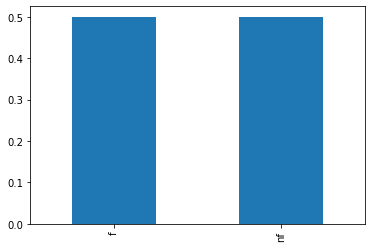

In [9]:
reviews_genuinity = df.label.value_counts(normalize=True)
reviews_genuinity = reviews_genuinity.sort_index()
reviews_genuinity.plot(kind="bar")

f     0.5
nf    0.5
Name: label, dtype: float64

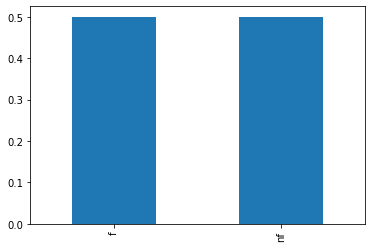

In [11]:
reviews_genuinity = df.label.value_counts(normalize=True)
reviews_genuinity[["f", "nf"]].plot(kind="bar")
reviews_genuinity

In [156]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.2)

# Random Forest

In [157]:
def bootstrapping(train_df, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    
    return df_bootstrapped

def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for i in range(n_trees):
        df_bootstrapped = bootstrapping(train_df, n_bootstrap)
        tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
        forest.append(tree)
    
    return forest

def random_forest_predictions(test_df, forest):
    df_predictions = {}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = decision_tree_predictions(test_df, tree=forest[i])
        df_predictions[column_name] = predictions

    df_predictions = pd.DataFrame(df_predictions)
    random_forest_predictions = df_predictions.mode(axis=1)[0]
    
    return random_forest_predictions

In [172]:
forest = random_forest_algorithm(train_df, n_trees=4, n_bootstrap=36, n_features=2, dt_max_depth=4)
predictions = random_forest_predictions(test_df, forest)
accuracy = calculate_accuracy(predictions, test_df.label)

print("Accuracy = {}".format(accuracy))

Accuracy = 1.0


In [173]:
forest = random_forest_algorithm(train_df, n_trees=4, n_bootstrap=40, n_features=4, dt_max_depth=4)

In [174]:
pprint(forest[0])

{'helpful_votes = >=50': [{'reply = Y': ['nf',
                                         {'profile_useful = >=20%': ['nf',
                                                                     'f']}]},
                          {'thickness = thin': [{'template = Y': [{'reply = Y': ['nf',
                                                                                 'f']},
                                                                  'f']},
                                                {'verified = True': ['nf',
                                                                     'f']}]}]}


In [175]:
pprint(forest[1])

{'star_rating = >=2': [{'profile_useful = >=20%': ['nf',
                                                   {'response = Y': ['nf',
                                                                     'f']}]},
                       {'helpful_votes = >=50': [{'reply = Y': ['nf',
                                                                {'profile_useful = >=20%': ['nf',
                                                                                            'f']}]},
                                                 'f']}]}


In [176]:
pprint(forest[2])

{'profile_useful = >=20%': [{'thickness = thin': ['f', 'nf']},
                            {'helpful_votes = >=50': [{'reply = Y': ['nf',
                                                                     'f']},
                                                      {'template = Y': ['f',
                                                                        {'star_rating = <2': ['nf',
                                                                                              'f']}]}]}]}


In [177]:
pprint(forest[3])

{'reply = Y': ['nf',
               {'star_rating = >2': ['f',
                                     {'thickness = thin': ['f',
                                                           {'verified = True': ['nf',
                                                                                'f']}]}]}]}


In [180]:
df_predictions = {}
for i in range(len(forest)):
    column_name = "tree_{}".format(i)
    predictions = decision_tree_predictions(test_df, tree=forest[i])
    df_predictions[column_name] = predictions

df_predictions = pd.DataFrame(df_predictions)

In [178]:
predictions = random_forest_predictions(test_df, forest)

In [181]:
df_predictions.head(8)

,tree_0,tree_1,tree_2,tree_3
24,f,f,f,f
26,f,f,f,f
2,nf,nf,nf,nf
16,f,f,nf,f
32,f,f,f,f
31,nf,nf,f,nf
25,f,nf,f,f
19,f,f,nf,nf


In [179]:
predictions

24     f
26     f
2     nf
16     f
32     f
31    nf
25     f
19     f
Name: 0, dtype: object